In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [98]:
df = pd.read_csv("AI_final.csv")

In [99]:
df.head()

,Unnamed: 0,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
1,32,-79.514764,43.767205,33,GO-2004315641,2004/04/17 04:00:00+00,2004,April,Saturday,108,...,Morning,D31,0,0,24,Black Creek,24,Black Creek (24),-79.514764,43.767205
2,43,-79.474292,43.755528,44,GO-2004239848,2004/04/21 04:00:00+00,2004,April,Wednesday,112,...,Night,D32,0,1,27,York University Heights,27,York University Heights (27),-79.474292,43.755528
3,72,-79.508172,43.743052,73,GO-2004602734,2004/07/13 04:00:00+00,2004,July,Tuesday,195,...,Afternoon,D31,0,1,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),-79.508172,43.743052
4,73,-79.522845,43.772989,74,GO-2004564223,2004/07/01 04:00:00+00,2004,July,Thursday,183,...,Night,D31,1,0,24,Black Creek,24,Black Creek (24),-79.522845,43.772989


In [100]:
df.describe()

,Unnamed: 0,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,HOOD_158,HOOD_140,LONG_WGS84,LAT_WGS84
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.00000,631.000000,631.000000
mean,2797.202853,-79.510083,43.756352,2798.202853,2014.264659,194.908082,15.949287,13.437401,0.096672,0.478605,25.049128,25.03645,-79.510083,43.756352
std,1645.464063,0.011610,0.010751,1645.464063,5.489500,99.850799,8.676769,8.251337,0.306291,0.755363,1.030855,1.03752,0.011610,0.010751
min,2.000000,-79.530787,43.734561,3.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24.000000,24.00000,-79.530787,43.734561
25%,1329.500000,-79.517107,43.749221,1330.500000,2009.000000,112.000000,9.000000,4.000000,0.000000,0.000000,24.000000,24.00000,-79.517107,43.749221
50%,2816.000000,-79.513442,43.754848,2817.000000,2016.000000,200.000000,16.000000,17.000000,0.000000,0.000000,25.000000,25.00000,-79.513442,43.754848
75%,4267.000000,-79.507169,43.765903,4268.000000,2019.000000,276.500000,24.000000,21.000000,0.000000,1.000000,25.000000,25.00000,-79.507169,43.765903
max,5689.000000,-79.465014,43.787288,5690.000000,2022.000000,365.000000,31.000000,23.000000,2.000000,6.000000,27.000000,27.00000,-79.465014,43.787288


In [101]:
df = df.drop(['X', 'Y', 'Unnamed: 0', 'OCC_YEAR', 'OCC_MONTH', 'EVENT_UNIQUE_ID', 'OBJECTID', 'DIVISION', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84' ], axis=1)

In [102]:
df.head(20)

,OCC_DATE,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DEATH,INJURIES
0,2004/05/14 04:00:00+00,Friday,135,14,16,Afternoon,1,1
1,2004/04/17 04:00:00+00,Saturday,108,17,11,Morning,0,0
2,2004/04/21 04:00:00+00,Wednesday,112,21,0,Night,0,1
3,2004/07/13 04:00:00+00,Tuesday,195,13,17,Afternoon,0,1
4,2004/07/01 04:00:00+00,Thursday,183,1,0,Night,1,0
5,2004/05/12 04:00:00+00,Wednesday,133,12,0,Night,0,0
6,2004/03/29 05:00:00+00,Monday,89,29,16,Afternoon,0,0
7,2004/04/15 04:00:00+00,Thursday,106,15,0,Night,0,2
8,2004/09/05 04:00:00+00,Sunday,249,5,23,Evening,0,0
9,2004/08/27 04:00:00+00,Friday,240,27,23,Evening,0,0


In [103]:
def is_violent(death, injuries):
  violent = death + injuries

  return violent


In [104]:
df['VIOLENT'] = df.apply(lambda row: is_violent(row['DEATH'], row['INJURIES']), axis=1)

In [105]:
df = df.drop(['DEATH', 'INJURIES'], axis = 1)

In [106]:
df.describe()

,OCC_DOY,OCC_DAY,OCC_HOUR,VIOLENT
count,631.000000,631.000000,631.000000,631.000000
mean,194.908082,15.949287,13.437401,0.575277
std,99.850799,8.676769,8.251337,0.798982
min,1.000000,1.000000,0.000000,0.000000
25%,112.000000,9.000000,4.000000,0.000000
50%,200.000000,16.000000,17.000000,0.000000
75%,276.500000,24.000000,21.000000,1.000000
max,365.000000,31.000000,23.000000,6.000000


In [107]:
df.head()

,OCC_DATE,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,VIOLENT
0,2004/05/14 04:00:00+00,Friday,135,14,16,Afternoon,2
1,2004/04/17 04:00:00+00,Saturday,108,17,11,Morning,0
2,2004/04/21 04:00:00+00,Wednesday,112,21,0,Night,1
3,2004/07/13 04:00:00+00,Tuesday,195,13,17,Afternoon,1
4,2004/07/01 04:00:00+00,Thursday,183,1,0,Night,1


In [108]:
df2 = df

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [110]:
# Preprocess the data
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])  # Convert OCC_DATE column to datetime
df.set_index('OCC_DATE', inplace=True)  # Set OCC_DATE as the index
df = df.resample('H').mean()  # Resample the data to hourly frequency and calculate the mean
df['VIOLENT'] = df['VIOLENT'].interpolate()  # Interpolate missing values in the VIOLENT column

<ipython-input-110-bbbaba495f50>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('H').mean()  # Resample the data to hourly frequency and calculate the mean


In [111]:
# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = df[:train_size], df[train_size:]

In [112]:
model = ARIMA(train_data['VIOLENT'], order=(1, 0, 1))

In [113]:
model_fit = model.fit()

In [114]:
# Generate predictions
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

In [115]:
# Calculate RMSE
mse = mean_squared_error(test_data['VIOLENT'], predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)
print(rmse - 0.575277)

Root Mean Squared Error (RMSE): 0.6476353322310853
0.07235833223108523


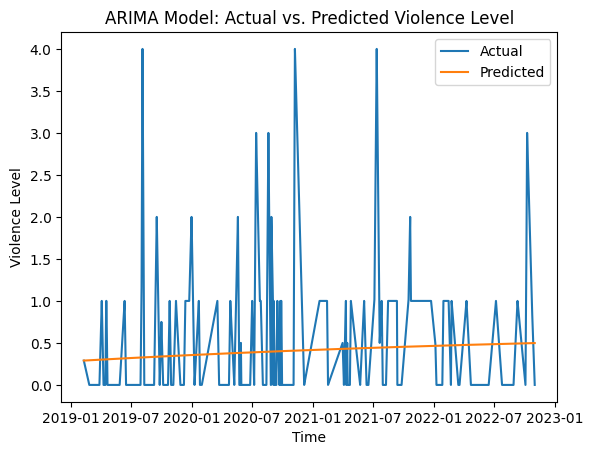

In [116]:
# Plot the actual vs. predicted values
plt.plot(test_data.index, test_data['VIOLENT'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Violence Level')
plt.title('ARIMA Model: Actual vs. Predicted Violence Level')
plt.legend()
plt.show()

In [117]:
from datetime import datetime

In [118]:
# Generate future predictions
forecast = model_fit.forecast(steps=len(test_data))

In [119]:
# Convert index to 24-hour format
forecast_index = test_data.index.strftime('%-H:%M')

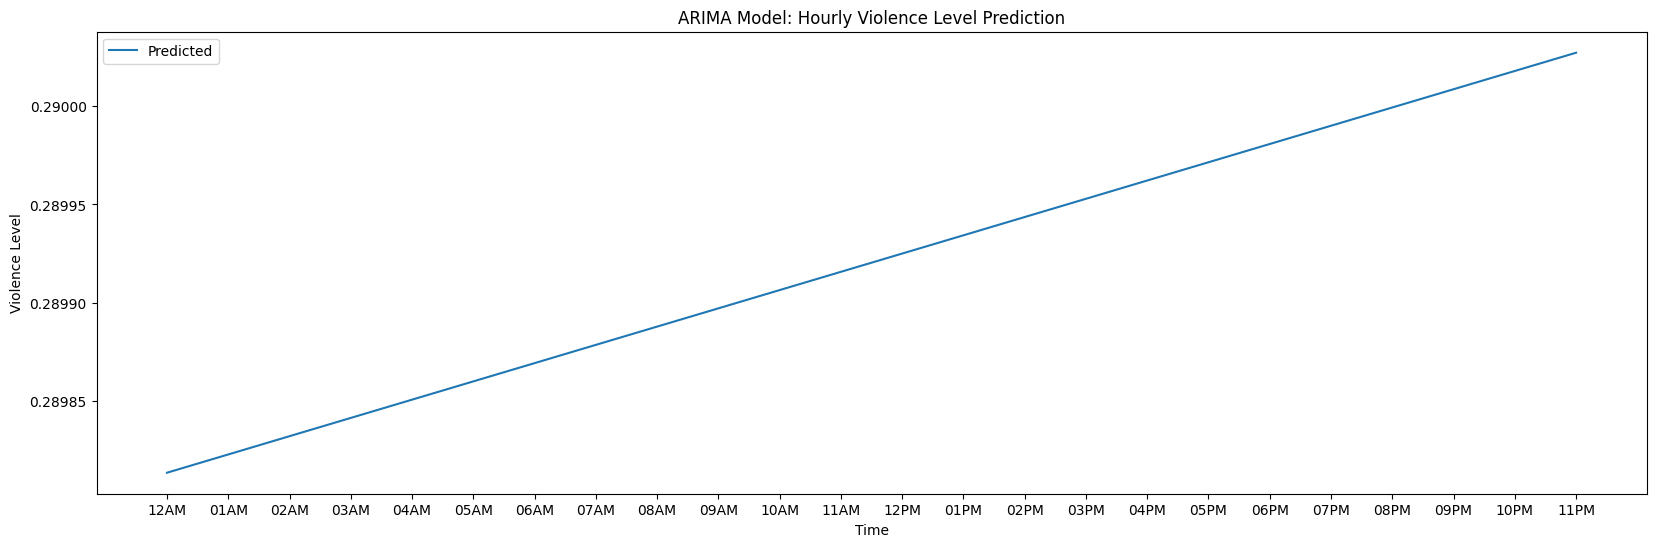

In [120]:
plt.figure(figsize=(20,6))
plt.plot(predicted_mean.index, predicted_mean.values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Violence Level')
plt.title('ARIMA Model: Hourly Violence Level Prediction')
plt.legend()
plt.show()

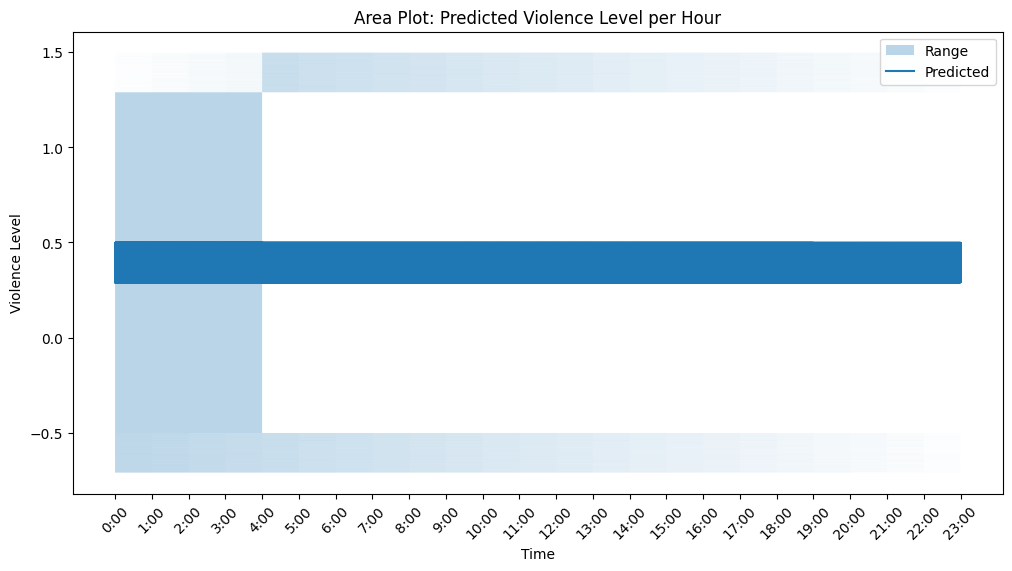

In [121]:
# Area Plot
plt.figure(figsize=(12, 6))
plt.fill_between(forecast_index, forecast - 1, forecast + 1, alpha=0.3, label='Range')
plt.plot(forecast_index, forecast, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Violence Level')
plt.title('Area Plot: Predicted Violence Level per Hour')
plt.xticks(rotation=45)
plt.legend()
plt.show()

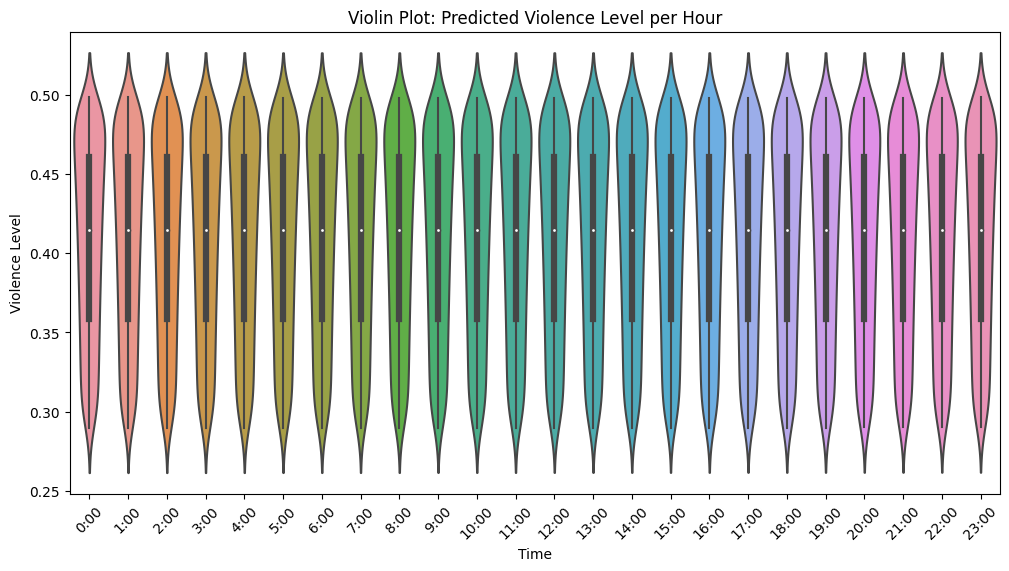

In [122]:
# Violin Plot
predicted_df = pd.DataFrame({'Violence Level': forecast, 'Time': forecast_index})
plt.figure(figsize=(12, 6))
sns.violinplot(x='Time', y='Violence Level', data=predicted_df)
plt.xlabel('Time')
plt.ylabel('Violence Level')
plt.title('Violin Plot: Predicted Violence Level per Hour')
plt.xticks(rotation=45)
plt.show()